In [245]:
%load_ext autoreload
%autoreload 2

from itertools import product

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from labellines import labelLine, labelLines

import random_walks as rw

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [155]:
walk = rw.gaussian_random_walk(n=10_000_000)

In [156]:
bb = rw.calculate_percent_bollinger_band(walk, bandwidth=3)

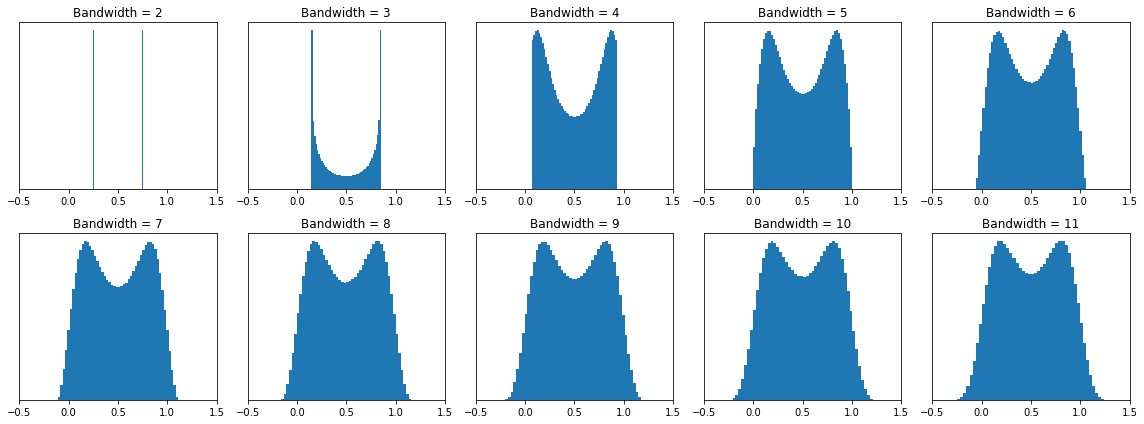

In [157]:
BANDWIDTHS = np.arange(2, 2*5 + 2 + 1)

fig, axs = plt.subplots(2, 5, figsize=(16, 3*2))

for ax, bandwidth in zip(axs.flatten(), BANDWIDTHS):
    bb = rw.calculate_percent_bollinger_band(walk, bandwidth=bandwidth)
    ax.hist(bb, bins=50, density=True)
    ax.set_xlim(-0.5, 1.5)
    ax.set_yticks([])
    ax.set_yticklabels([])
    ax.set_title(f"Bandwidth = {bandwidth}")

    fig.tight_layout()

In [215]:
walk2d = rw.bernoulli_random_walk_2d(shape=(1_000_000, 20))

In [216]:
bb = rw.calculate_percent_bollinger_band_2d(walk2d)

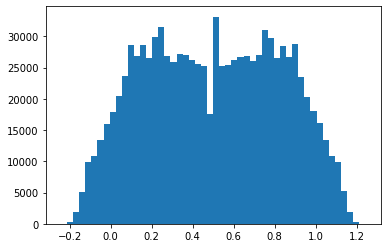

In [217]:
_ = plt.hist(bb, bins=50)

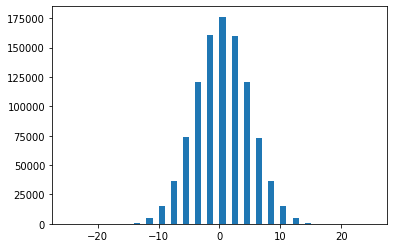

In [218]:
_ = plt.hist(walk2d[:, -1], bins=50, range=(-25, 25))

In [219]:
mean, sd = walk2d.mean(axis=1), walk2d.std(axis=1)

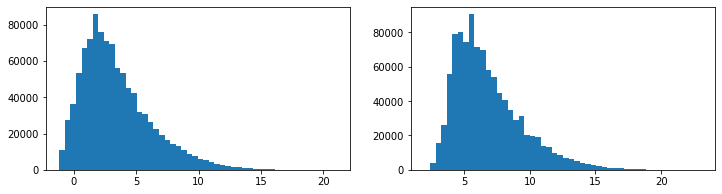

In [220]:
fig, ax = plt.subplots(1, 2, figsize=(12, 3))

_ = ax[0].hist(walk2d[:, -1] - (mean - 2*sd), bins=50)
_ = ax[1].hist(4*sd, bins=50)

In [232]:
numerator, denominator = walk2d[:, -1] - (mean - 2*sd), 4*sd

<ipython-input-233-86d836c69c77>:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


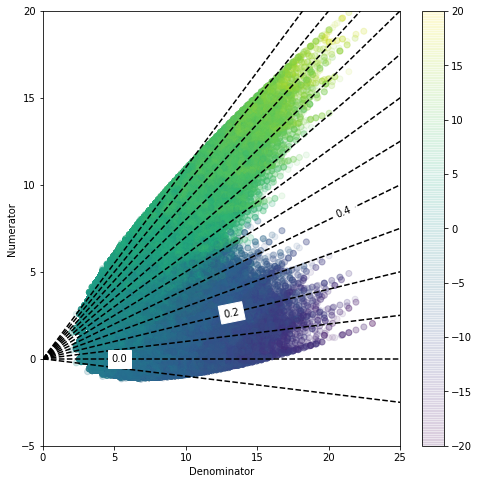

In [233]:
fig, ax = plt.subplots(figsize=(8, 8))

sc = ax.scatter(denominator, numerator, alpha=0.1, c=walk2d[:, -1])
fig.colorbar(sc)

ms = np.linspace(-0.1, 1.1, num=13)
ts = np.linspace(0, 50, num=10)
for m in ms:
    ys = m * ts
    ax.plot(ts, ys, linestyle='--', color='black', label=f"{m:0.1f}")

lines = plt.gca().get_lines()[1::2]
labelLines(lines)

ax.set_xlim([0, 25])
ax.set_ylim([-5, 20])

ax.set_xlabel("Denominator")
ax.set_ylabel("Numerator")

fig.show()

<ipython-input-254-d2b8862ae08d>:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


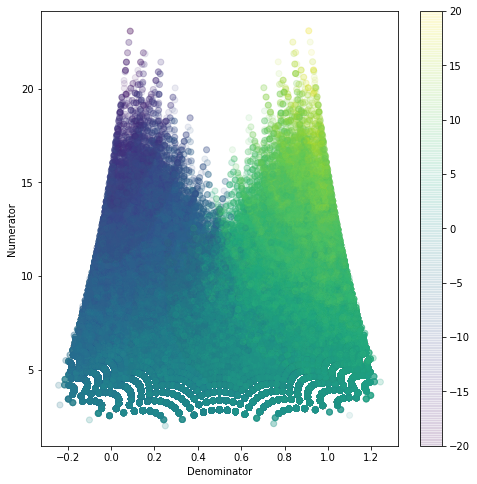

In [254]:
fig, ax = plt.subplots(figsize=(8, 8))

sc = ax.scatter(numerator/denominator, np.sqrt((numerator/denominator)**2 + denominator**2), alpha=0.1, c=walk2d[:, -1])
fig.colorbar(sc)

# ms = np.linspace(-0.1, 1.1, num=13)
# ts = np.linspace(0, 50, num=10)
# for m in ms:
#     ys = m * ts
#     ax.plot(ts, ys, linestyle='--', color='black', label=f"{m:0.1f}")

# lines = plt.gca().get_lines()[1::2]
# labelLines(lines)

# ax.set_xlim([0, 25])
# ax.set_ylim([-5, 20])

ax.set_xlabel("Denominator")
ax.set_ylabel("Numerator")

fig.show()

<ipython-input-237-3849f5efcd15>:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


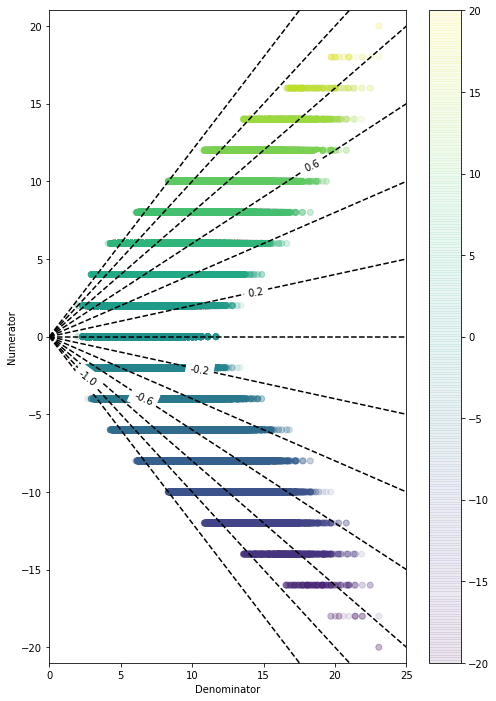

In [237]:
fig, ax = plt.subplots(figsize=(8, 12))

sc = ax.scatter(denominator, walk2d[:, -1], alpha=0.1, c=walk2d[:, -1])
fig.colorbar(sc)

ms = np.linspace(-1.2, 1.2, num=13)
ts = np.linspace(0, 25, num=10)
for m in ms:
    ys = m * ts
    ax.plot(ts, ys, linestyle='--', color='black', label=f"{m:0.1f}")

lines = plt.gca().get_lines()[1::2]
labelLines(lines)

ax.set_xlim([0, 25])
ax.set_ylim([-21, 21])

ax.set_xlabel("Denominator")
ax.set_ylabel("Numerator")

fig.show()

In [238]:
means = walk2d.mean(axis=1)

<ipython-input-251-ccadb21ba174>:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


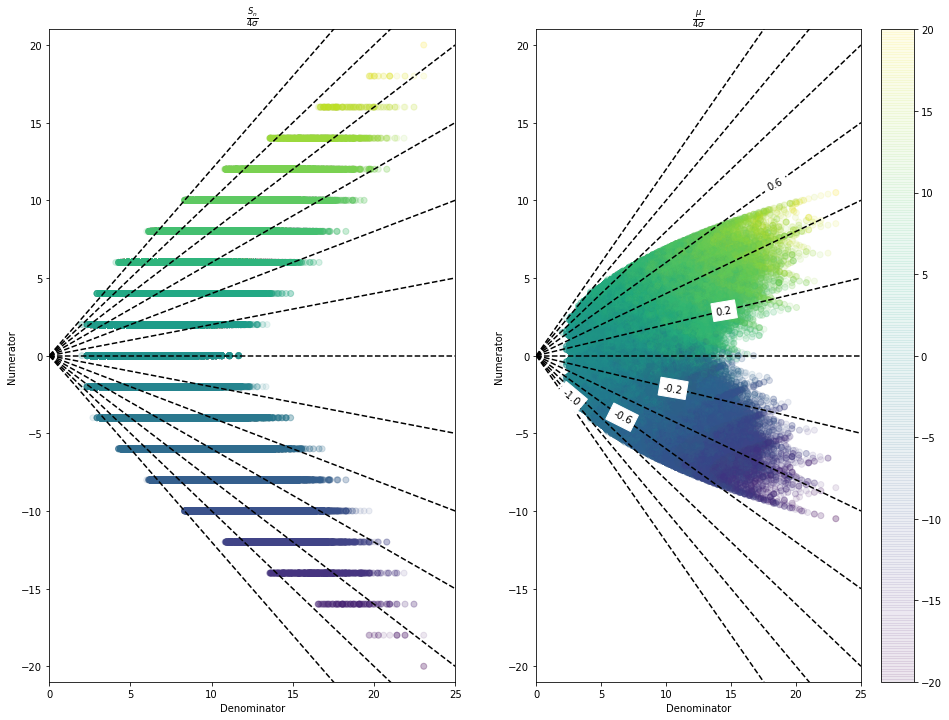

In [251]:
fig, axs = plt.subplots(1, 2, figsize=(8*2, 12))

# First Term

sc = axs[0].scatter(denominator, walk2d[:, -1], alpha=0.1, c=walk2d[:, -1])
axs[0].set_title(r"$\frac{S_n}{4 \sigma}$")

sc = axs[1].scatter(denominator, means, alpha=0.1, c=walk2d[:, -1])
axs[1].set_title(r"$\frac{\mu}{4 \sigma}$")

fig.colorbar(sc)

ms = np.linspace(-1.2, 1.2, num=13)
ts = np.linspace(0, 25, num=10)
for m, ax in product(ms, axs):
    ys = m * ts
    ax.plot(ts, ys, linestyle='--', color='black', label=f"{m:0.1f}")

lines = plt.gca().get_lines()[1::2]
labelLines(lines)

for ax in axs:
    ax.set_xlim([0, 25])
    ax.set_ylim([-21, 21])
    ax.set_xlabel("Denominator")
    ax.set_ylabel("Numerator")

fig.show()

<ipython-input-255-6c20bf2cfd03>:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


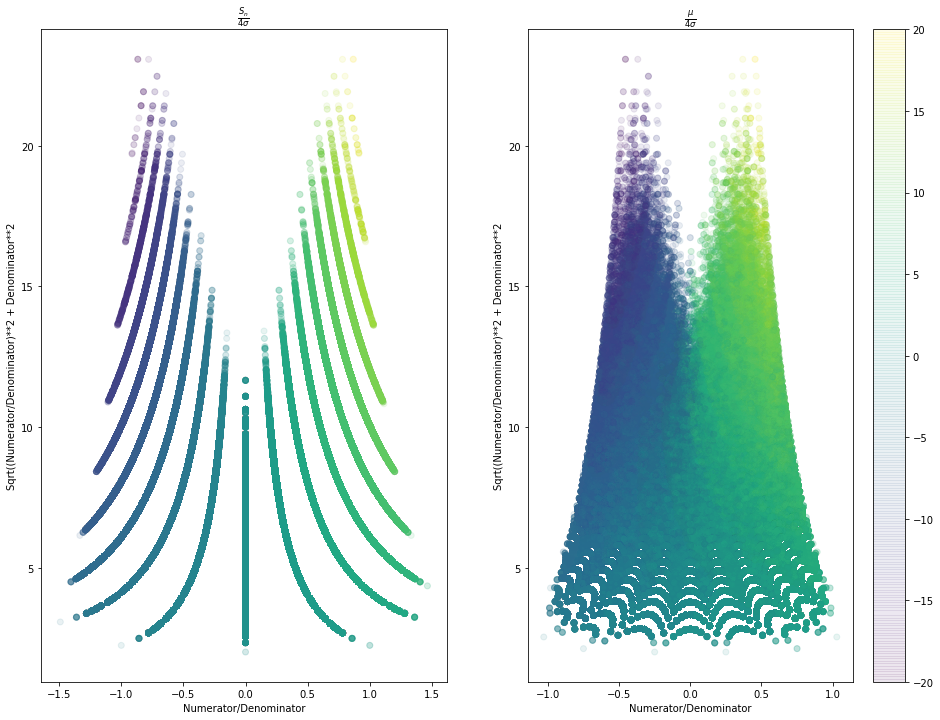

In [255]:
fig, axs = plt.subplots(1, 2, figsize=(8*2, 12))

# First Term

sc = axs[0].scatter(
    walk2d[:, -1]/denominator, 
    np.sqrt((walk2d[:, -1]/denominator)**2 + denominator**2),
    alpha=0.1, c=walk2d[:, -1])
axs[0].set_title(r"$\frac{S_n}{4 \sigma}$")

sc = axs[1].scatter(
    means/denominator, 
    np.sqrt((means/denominator)**2 + denominator**2), alpha=0.1, c=walk2d[:, -1])
axs[1].set_title(r"$\frac{\mu}{4 \sigma}$")

fig.colorbar(sc)

for ax in axs:
    ax.set_xlabel("Numerator/Denominator")
    ax.set_ylabel("Sqrt((Numerator/Denominator)**2 + Denominator**2")

fig.show()

In [222]:
bbseries = pd.Series(bb)

In [223]:
nearleft = bbseries[(bbseries >= 0.09) & (bbseries <= 0.11)]
nearmiddle = bbseries[(bbseries >= 0.49) & (bbseries <= 0.51)]
nearright = bbseries[(bbseries >= 0.89) & (bbseries <= 0.91)]

In [224]:
nearleftwalks = walk2d[nearleft.index[:5].to_list(), :]
nearmiddlewalks = walk2d[nearmiddle.index[:5].to_list(), :]
nearrightwalks = walk2d[nearright.index[:5].to_list(), :]

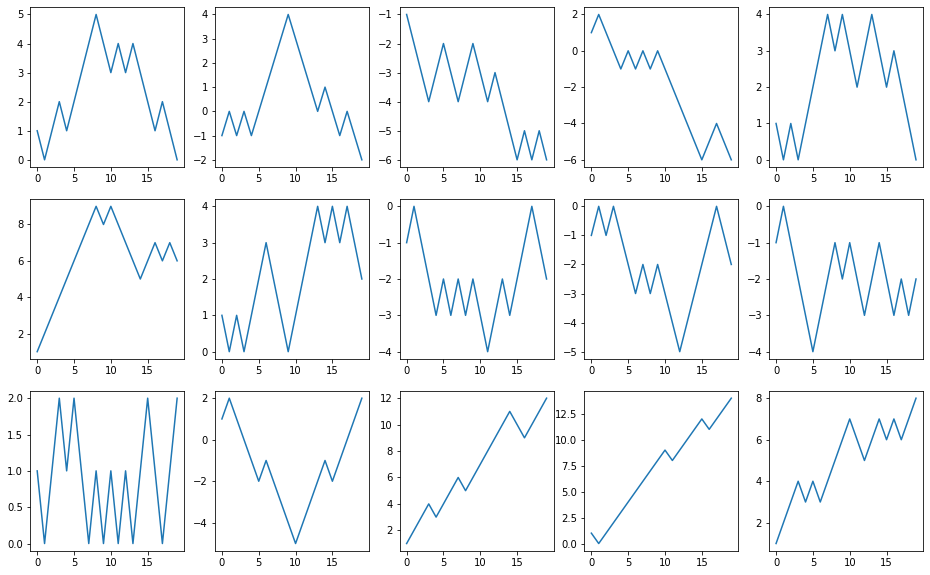

In [225]:
fig, axs = plt.subplots(3, 5, figsize=(16, 10))

walks = np.concatenate([nearleftwalks, nearmiddlewalks, nearrightwalks])

for ax, walk in zip(axs.flatten(), walks):
    ax.plot(np.arange(len(walk)), walk)